# CS 171 Homework 2

In this homework assignment, you will explore the application of the classification algorithms we have seen in class so far.

**Import the modules for this notebook**

Begin by importing any pertinent modules for classification and visualizing model results:

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

## Motivation and Data

Adélie penguins are an important species on the Antarctic continent. The image below shows two Adélie penguins:

<img src="Adelie_Penguins.png" alt="Adelie Penguins" width="500">

When biologists conduct fieldwork, they often need to know the sex of the penguin to understand their behavior such as foraging and mating. However, identifying the sex of a penguin either requires molecular analysis or other invasive procedures. Thus, an ideal alternative is to use a morphometric analysis - that is, collecting data on easily-measurable characteristics such as the weight or height. In this assignment, we'll build a model to classify a penguin as male or female based on measurements of body weight and two different bill metrics. The data comes from the following paper:

Fattorini, Niccolò, and Silvia Olmastroni. "[Pitfalls and advances in morphometric sexing: insights from the Adélie penguin Pygoscelis adeliae](https://doi.org/10.1007/s00300-021-02893-6)." Polar Biology 44.8 (2021): 1563-1573.

The authors have kindly provided us with their data for this homework assignment and have asked us only to use this data for the purposes of this class.

To begin, let's read in the dataset below:

In [3]:
df = pd.read_csv('adelie_penguins.csv')

In [4]:
df.head()

,Penguin_ID,Body_weight,Bill_depth,Bill_length,Sex
0,ID_1,3500,17.39,35.96,M
1,ID_2,3600,17.35,35.76,M
2,ID_3,3250,17.20,37.55,M
3,ID_4,3950,17.90,36.85,F
4,ID_5,3600,16.54,36.66,M


As we can see, the sex of the penguin in shown in the final column and the previous columns have other features of the penguins.

## Problem 2.1: Visualize the data
To get familiar with this dataset, make a scatter plot of the data. Choose one of the penguin features to plot on the $x$-axis and another to plot on the $y$-axis. The dots should be colored by the penguin sex (male or female). Be sure to add a legend, a title, and label your axes.

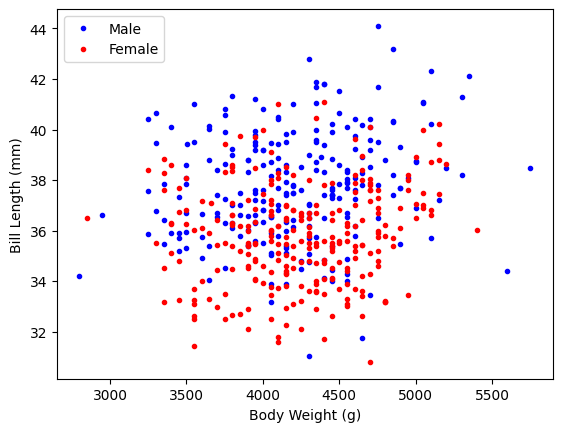

In [5]:
# enter code to make your plot here
plt.plot(df['Body_weight'][df['Sex'] == 'M'], 
         df['Bill_length'][df['Sex'] == 'M'], 'b.', label='Male')
plt.plot(df['Body_weight'][df['Sex'] == 'F'], 
         df['Bill_length'][df['Sex'] == 'F'], 'r.', label='Female')
plt.xlabel('Body Weight (g)')
plt.ylabel('Bill Length (mm)')
plt.legend(loc=2)
plt.show()

## Problem 2.2: Prepare the features

In the past few lectures, we have seen several applications of classifiers. Below, you will test out two of the classifiers we have seen so far. However, when we construct our models, we need to do three organizational steps with our data:

1. Form a design matrix **X** which has the features in columns and the target features $y$.
2. Standardize the data
3. Split the features into a set which will be used for training and another set which will be used for validation.

Tackle these two steps in the following code blocks:

In [21]:
# form the design matrix with two of the model features
X = df[['Body_weight', 'Bill_length']]

# standardize the data
body_weight_norm = (df['Body_weight'] - np.mean(df['Body_weight'])) / np.std(df['Body_weight'])
bill_length_norm = (df['Bill_length'] - np.mean(df['Bill_length'])) / np.std(df['Bill_length'])
X_norm = np.column_stack([body_weight_norm, bill_length_norm])
df['Classification'] = 0
df.loc[df['Sex'] == 'F', 'Classification'] = 1

# form the target data vector
y = df['Classification']

In [22]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

## Problem 2.3: Implement a classifier

Implement one of the classifiers we have seen in class so far. Your classifier should take two of the available model features (for example, bill length and body weight) and return a classification (0 or 1) for the sex of the penguin (female or male). After fitting your model to your training data, quantify the performance by computing the loss rate (the number of correct classifications vs total classifications) for the test data.

In [23]:
# implement one of your classifiers here
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


In [24]:
# compute the loss rate predicted by your model
loss_rate = 1 - accuracy_score(y_test, y_pred)
print(f'Loss Rate: {loss_rate:.2f}')


Loss Rate: 0.35


Visualize the performance on a plot by shading the background of the plot according to the model predictions and plotting the data on top of the shading.

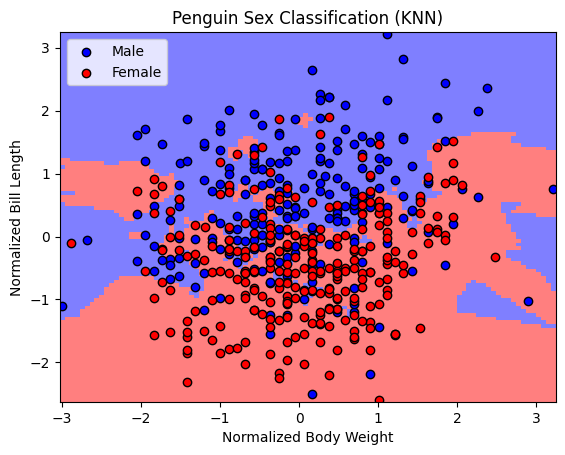

In [25]:
# enter code to make your plot here
min_BW = X_norm[:, 0].min()
max_BW = X_norm[:, 0].max()
min_BL = X_norm[:, 1].min()
max_BL = X_norm[:, 1].max()

Body_weight_grid = np.linspace(min_BW, max_BW, 100)
Bill_length_grid = np.linspace(min_BL, max_BL, 100)
BW_mesh, BL_mesh = np.meshgrid(Body_weight_grid, Bill_length_grid)

predictions = knn.predict(np.column_stack([BW_mesh.ravel(), BL_mesh.ravel()]))
predictions = predictions.reshape(np.shape(BW_mesh))

cmap_background = ListedColormap(['blue', 'red'])
plt.pcolormesh(BW_mesh, BL_mesh, predictions, cmap=cmap_background, alpha=0.5, vmin=predictions.min(), vmax=predictions.max())

cmap_points = {0: 'blue', 1: 'red'}
label_names = {0: 'Male', 1: 'Female'}

for label in np.unique(y):
    plt.scatter(X_norm[y == label, 0], X_norm[y == label, 1], c=cmap_points[label], label=label_names[label], edgecolor='k')

plt.xlabel('Normalized Body Weight')
plt.ylabel('Normalized Bill Length')
plt.title('Penguin Sex Classification (KNN)')
plt.legend(loc=2)
plt.show()


## Problem 2.4: Implement another classifier

Repeat the implementation and plotting routine above for a different classification model (but the same model features).

In [29]:
# implement your other classifier here
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [30]:
# compute the loss rate predicted by your second model
y_pred2 = logistic_regression_model.predict(X_test)
loss_rate2 = 1 - accuracy_score(y_test, y_pred2)
print(f'Loss Rate (Logistic Regression): {loss_rate2:.2f}')

Loss Rate (Logistic Regression): 0.38


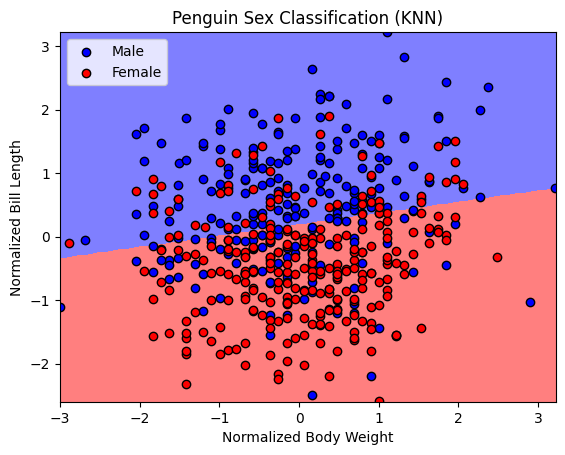

In [31]:
# enter code to make your plot here
min_BW = X_norm[:, 0].min()
max_BW = X_norm[:, 0].max()
min_BL = X_norm[:, 1].min()
max_BL = X_norm[:, 1].max()

Body_weight_grid = np.linspace(min_BW, max_BW, 500)
Bill_length_grid = np.linspace(min_BL, max_BL, 500)
BW_mesh, BL_mesh = np.meshgrid(Body_weight_grid, Bill_length_grid)

predictions = logistic_regression_model.predict(np.column_stack([BW_mesh.ravel(), BL_mesh.ravel()]))
predictions = predictions.reshape(np.shape(BW_mesh))

cmap_background = ListedColormap(['blue', 'red'])
plt.pcolormesh(BW_mesh, BL_mesh, predictions, cmap=cmap_background, alpha=0.5, vmin=predictions.min(), vmax=predictions.max())

cmap_points = {0: 'blue', 1: 'red'}
label_names = {0: 'Male', 1: 'Female'}

for label in np.unique(y):
    plt.scatter(X_norm[y == label, 0], X_norm[y == label, 1], c=cmap_points[label], label=label_names[label], edgecolor='k')

plt.xlabel('Normalized Body Weight')
plt.ylabel('Normalized Bill Length')
plt.title('Penguin Sex Classification (KNN)')
plt.legend(loc=2)
plt.show()

## Problem 2.5: Assess model results

Write 5 sentences comparing and contrasting your model results above. Comment on the model performance on the test data, the potential for over- or under-fitting, the sensitivity to different model features, and potentially other considerations pertinent to assessing the models.

The first model I used was k-nearest neighbors (KNN). It appears that this model managed to capture some of the characteristics of the data, although there were still a high concentration of male penguins that fell into the female region of the classification. This model's classification was much more nuanced than the second model I used, which was the Logistic Regression model. This model attempted to establish a linear delineation between female and male penguins, which was clearly not the case with the dataset. This model definitely underfitted to the data, and it is possible the same happened for the KNN model, although it is unclear for the KNN model because the data was so tightly clustered together that it is also possible that the KNN model overfitted.

## Problem 2.6: A little more data

A colleague has just called you from Antarctica and has asked your help in identify the sex of a few penguins in a colony they are studying. They give you the following information:

| Body Weight (g)  | Bill Depth (mm) | Bill Length (mm) |
|---------------|------------|-------------|
| 4000 | 19.04 | 37.81 |
| 3800 | 16.75 | 38.55 |
| 3700 | 18.12 | 39.49 |
| 4000 | 18.18 | 35.61 |
| 4500 | 18.62 | 36.87 |
| 4300 | 16.69 | 35.72 |

Using the above data and your models, run some computations to determine the sex of these penguins.

In [32]:
# run your computations here
data = np.array([[ 4000.0 , 19.04 , 37.81 ],
                 [ 3800.0 , 16.75 , 38.55 ],
                 [ 3700.0 , 18.12 , 39.49 ],
                 [ 4000.0 , 18.18 , 35.61 ],
                 [ 4500.0 , 18.62 , 36.87 ],
                 [ 4300.0 , 16.69 , 35.72 ]])

df = pd.DataFrame(data, columns=['Body_weight', 'Bill_depth', 'Bill_length'])
BW_norm = (df['Body_weight'] - np.mean(df['Body_weight'])) / np.std(df['Body_weight'])
BL_norm = (df['Bill_length'] - np.mean(df['Bill_length'])) / np.std(df['Bill_length'])
X_new_norm = np.column_stack([BW_norm, BL_norm])
labels = knn.predict(X_new_norm)

for i, label in enumerate(labels):
    print(f'Penguin {i+1}: Predicted Sex = {"Male" if label == 0 else "Female"}')




Penguin 1: Predicted Sex = Male
Penguin 2: Predicted Sex = Male
Penguin 3: Predicted Sex = Male
Penguin 4: Predicted Sex = Female
Penguin 5: Predicted Sex = Female
Penguin 6: Predicted Sex = Female


In the markdown cell below, write a short message to your colleague with your predictions of the penguins' sex. Be sure to include a sentence about potential errors in your approach and which penguins you may be unsure about.

Using the KNN model, it is predicted that penguins 1-3 are males, and penguins 4-6 are females. I am unsure about penguin #1, as the data for penguin 1 is quite similar to that of penguins 4-6, despite the labels being different.